In [36]:
# 加载数据
import pandas as pd
import numpy as np
data = pd.read_csv("task2_data.csv")
data.head()

,x1,x2,y
0,9.23,3.97,0
1,8.29,2.81,0
2,7.82,1.31,0
3,6.20,0.69,0
4,4.79,1.14,0


In [37]:
# x y赋值
x = data.drop(['y'],axis=1)
y = data.loc[:,'y']
x.head()

,x1,x2
0,9.23,3.97
1,8.29,2.81
2,7.82,1.31
3,6.20,0.69
4,4.79,1.14


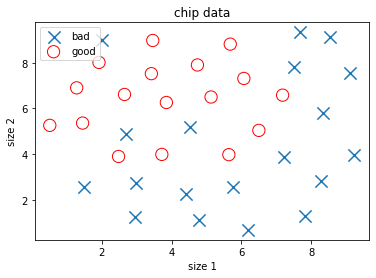

In [38]:
# 数据可视化
from matplotlib import pyplot as plt
fig1 = plt.figure()
bad = plt.scatter(x.loc[:,'x1'][y==0],x.loc[:,'x2'][y==0],marker='x',s=150,label='bad')
good = plt.scatter(x.loc[:,'x1'][y==1],x.loc[:,'x2'][y==1],marker='o',facecolor='none',edgecolor='red',s=150,label='good')
plt.title('chip data')
plt.xlabel('size 1')
plt.ylabel('size 2')
plt.legend()
plt.show()

In [39]:
import math
x1 = data.loc[:,'x1'][y==0]
x2 = data.loc[:,'x2'][y==0]
# 计算均值与标准差
u1 = x1.mean()
sigma1 = x1.std()
u2 = x2.mean()
sigma2 = x2.std()
# print(u1,sigma1,u2,sigma2)
# 计算高斯分布的概率密度函数
p1 = 1/sigma1/math.sqrt(2*math.pi)*np.exp(-np.power((x1-u1),2)/2/math.pow(sigma1,2))
p2 = 1/sigma2/math.sqrt(2*math.pi)*np.exp(-np.power((x2-u2),2)/2/math.pow(sigma2,2))
p = np.multiply(p1,p2)
print(p)
print('max_p:',max(p))
print('min_p:',min(p))
print('max_p/min_p:',max(p)/min(p))

0     0.008934
1     0.011729
2     0.009050
3     0.009334
4     0.010360
5     0.017426
6     0.018206
7     0.011982
8     0.005428
9     0.003318
10    0.003993
11    0.008846
12    0.013695
13    0.006155
14    0.009603
15    0.004068
16    0.009740
17    0.017871
35    0.001980
dtype: float64
max_p: 0.01820586881510458
min_p: 0.001979598419462152
max_p/min_p: 9.196748510261507


In [40]:
x1 = data.loc[:,'x1'][y==1]
x2 = data.loc[:,'x2'][y==1]
# 计算均值与标准差
u1 = x1.mean()
sigma1 = x1.std()
u2 = x2.mean()
sigma2 = x2.std()
# print(u1,sigma1,u2,sigma2)
# 计算高斯分布的概率密度函数
p1 = 1/sigma1/math.sqrt(2*math.pi)*np.exp(-np.power((x1-u1),2)/2/math.pow(sigma1,2))
p2 = 1/sigma2/math.sqrt(2*math.pi)*np.exp(-np.power((x2-u2),2)/2/math.pow(sigma2,2))
p = np.multiply(p1,p2)
print(p)
print('max_p:',max(p))
print('min_p:',min(p))
print('max_p/min_p:',max(p)/min(p))

18    0.012190
19    0.014357
20    0.010784
21    0.016214
22    0.011710
23    0.019200
24    0.040827
25    0.049422
26    0.040404
27    0.022859
28    0.010804
29    0.029370
30    0.038174
31    0.013827
32    0.018771
33    0.020275
34    0.009243
dtype: float64
max_p: 0.04942244529970458
min_p: 0.00924331025588934
max_p/min_p: 5.346833973058002


In [41]:
# 异常数据点的检测
from sklearn.covariance import EllipticEnvelope
ad_model = EllipticEnvelope(contamination=0.02)
ad_model.fit(x[y==0])
y_predict_bad = ad_model.predict(x[y==0])
print(y_predict_bad)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1]


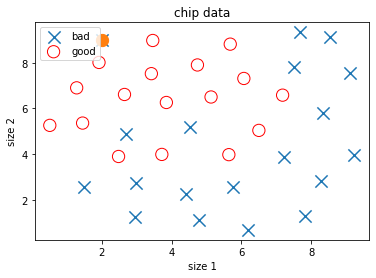

In [42]:
fig2 = plt.figure()
bad = plt.scatter(x.loc[:,'x1'][y==0],x.loc[:,'x2'][y==0],marker='x',s=150,label='bad')
good = plt.scatter(x.loc[:,'x1'][y==1],x.loc[:,'x2'][y==1],marker='o',facecolor='none',edgecolor='red',s=150,label='good')
plt.scatter(x.loc[:,'x1'][y==0][y_predict_bad==-1],x.loc[:,'x2'][y==0][y_predict_bad==-1],marker='o',s=150)
plt.title('chip data')
plt.xlabel('size 1')
plt.ylabel('size 2')
plt.legend()
plt.show()

In [43]:
# 剔除异常数据点
print(data.shape)
data = data.drop(index=35)
print(data.shape)

(36, 3)
(35, 3)


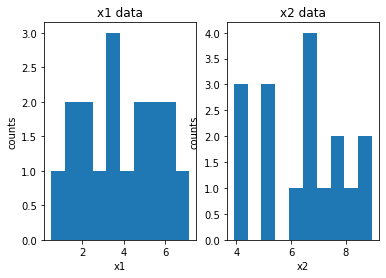

In [44]:
# 各维度数据分布
fig3 = plt.figure()
plt.subplot(121)
plt.hist(x1,bins=10)
plt.title('x1 data')
plt.xlabel('x1')
plt.ylabel('counts')
plt.subplot(122)
plt.hist(x2,bins=10)
plt.title('x2 data')
plt.xlabel('x2')
plt.ylabel('counts')
plt.show()

In [45]:
print(x.shape)

(36, 2)


In [49]:

# x y赋值
x = data.drop(['y'],axis=1)
y = data.loc[:,'y']
x.head()
print(x.shape)

(35, 2)


[0.5369408 0.4630592]


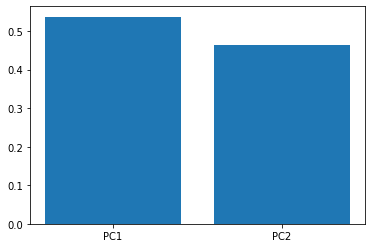

In [52]:
# 主成分分析
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
x_norm = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
x_reduced = pca.fit_transform(x_norm)
var_ratio = pca.explained_variance_ratio_
print(var_ratio)
fig4 = plt.figure()
plt.bar([1,2],var_ratio)
plt.xticks([1,2],['PC1','PC2'])
plt.show()

In [53]:
# 数据分离
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,test_size=0.4)
print(x_train.shape,x_test.shape,x.shape)

(21, 2) (14, 2) (35, 2)


In [54]:
# 建立knn模型 k=3
from sklearn.neighbors import KNeighborsClassifier
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [55]:
# 模型预测
y_train_predict = knn_3.predict(x_train)
y_test_predict = knn_3.predict(x_test)
print(y_train_predict,y_test_predict)

[1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0] [0 1 0 1 1 0 0 1 1 1 1 1 0 0]


In [56]:
# 计算准确率
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train,y_train_predict)
accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_train,accuracy_test)

0.8095238095238095 0.7857142857142857


In [61]:
# 结果可视化
# 生成结果用于结果可视化的数据集
xx,yy = np.meshgrid(np.arange(0,10,0.05),np.arange(0,10,0.05))
# 数据展开
x_range = np.c_[xx.ravel(),yy.ravel()]
print(x_range.shape)
print(x_range)

(40000, 2)
[[0.   0.  ]
 [0.05 0.  ]
 [0.1  0.  ]
 ...
 [9.85 9.95]
 [9.9  9.95]
 [9.95 9.95]]


In [62]:
# 预测生成的数据对应的类别
y_range_predict = knn_3.predict(x_range)

D:\anaconda\envs\env_ml\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


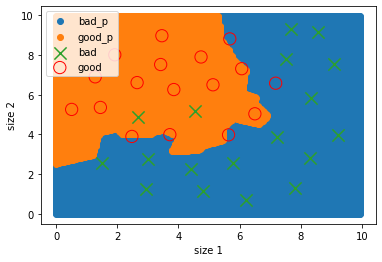

In [66]:
fig4 = plt.figure()
bad_p = plt.scatter(x_range[:,0][y_range_predict==0],x_range[:,1][y_range_predict==0],label='bad_p')
good_p = plt.scatter(x_range[:,0][y_range_predict==1],x_range[:,1][y_range_predict==1],label='good_p')

bad = plt.scatter(x.loc[:,'x1'][y==0],x.loc[:,'x2'][y==0],marker='x',s=150,label='bad')
good = plt.scatter(x.loc[:,'x1'][y==1],x.loc[:,'x2'][y==1],marker='o',facecolor='none',edgecolor='red',s=150,label='good')

plt.xlabel('size 1')
plt.ylabel('size 2')
plt.legend()
plt.show()

In [67]:
# 计算混淆矩阵
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_test_predict)
print(cm)

[[4 1]
 [2 7]]


In [68]:
# 获取混淆矩阵元素
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
print(TP,TN,FP,FN)

7 4 1 2


In [69]:
# 准确率
accuracy = (TP+TN)/(TP+TN+FP+FN)
print(accuracy)

0.7857142857142857


In [70]:
# 召回率(灵敏度)
recall = TP/(TP+FN)
print(recall)

0.7777777777777778


In [71]:
# 特异度
specificity = TN / (TN + FP)
print(specificity)

0.8


In [72]:
# 精确度
precision = TP/(TP + FP)
print(precision)

0.875


In [73]:
# F1分数
f1 = 2*precision*recall/(precision+recall)
print(f1)

0.823529411764706


In [80]:
# 尝试不同的k值，并计算准确率
n = [i for i in range(1,21)]
accuracy_train = []
accuracy_test = []
# print(n)
for i in n:
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(x_train,y_train)
    y_train_predict = knn_i.predict(x_train)
    y_test_predict = knn_i.predict(x_test)
    accuracy_train_i = accuracy_score(y_train,y_train_predict)
    accuracy_test_i = accuracy_score(y_test,y_test_predict)
    accuracy_train.append(accuracy_train_i)
    accuracy_test.append(accuracy_test_i)
print(accuracy_train,accuracy_test)

[1.0, 0.8571428571428571, 0.8095238095238095, 0.7619047619047619, 0.8571428571428571, 0.8095238095238095, 0.8095238095238095, 0.8095238095238095, 0.8095238095238095, 0.8095238095238095, 0.7619047619047619, 0.8095238095238095, 0.8095238095238095, 0.8095238095238095, 0.7619047619047619, 0.6190476190476191, 0.6190476190476191, 0.6190476190476191, 0.6190476190476191, 0.6190476190476191] [0.7142857142857143, 0.6428571428571429, 0.7857142857142857, 0.6428571428571429, 0.8571428571428571, 0.6428571428571429, 0.7142857142857143, 0.5714285714285714, 0.7142857142857143, 0.6428571428571429, 0.7142857142857143, 0.6428571428571429, 0.7142857142857143, 0.5714285714285714, 0.6428571428571429, 0.35714285714285715, 0.35714285714285715, 0.35714285714285715, 0.35714285714285715, 0.35714285714285715]


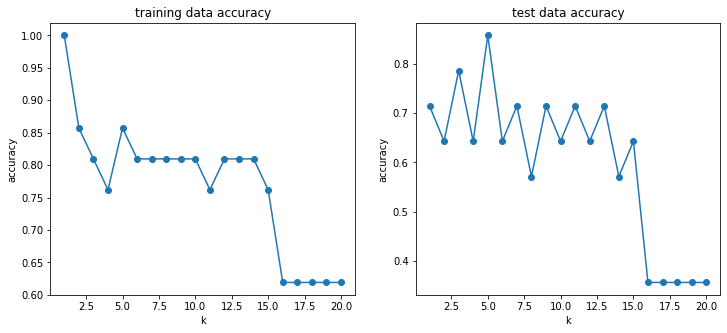

In [82]:
# k值变化对准确率影响的结果可视化
fig5 = plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(n,accuracy_train,marker='o')
plt.title('training data accuracy')
plt.xlabel('k')
plt.ylabel('accuracy')

plt.subplot(122)
plt.plot(n,accuracy_test,marker='o')
plt.title('test data accuracy')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()